In [2]:
cd project

C:\Users\mixedfruit\project


In [3]:
import pandas as pd
import seaborn as cbs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

Gathering the data

In [4]:
data=pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df=data.drop("Outcome",axis=1)

In [9]:
target=data["Outcome"]

Now let us Plot the data


We will us PCA to reduce the dimensions

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
pca_data=pca.fit_transform(df)

Number of People with Diabetes   : 500
Number of People without Diabetes: 268


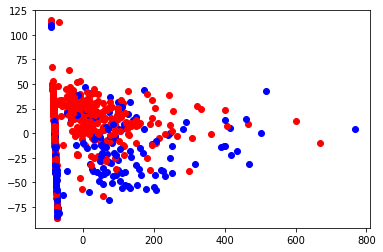

In [13]:
cr=0
cb=0
for i in range(target.size):
    if target[i]==0:
        cr+=1
        plt.plot(pca_data[i,0],pca_data[i,1],'ro')
    else:
        cb+=1
        plt.plot(pca_data[i,0],pca_data[i,1],'bo')

print("Number of People with Diabetes   :",cr)
print("Number of People without Diabetes:",cb)

We can see that the data cannot be separated with Linear regression. But still let us try

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
lin_classifier=SVC(kernel="rbf")
lin_classifier.fit(df,target)
print("Accuracy with a Linear SVC is :",accuracy_score(target,lin_classifier.predict(df)))

Accuracy with a Linear SVC is : 1.0


To Visualize let us apply PCA before applying the classifier

In [16]:
lin_classifier2=SVC(kernel="rbf")
lin_classifier2.fit(pca_data,target)
print("Accuracy with a Linear SVC on PCA data :",accuracy_score(target,lin_classifier2.predict(pca_data)))

Accuracy with a Linear SVC on PCA data : 0.9166666666666666


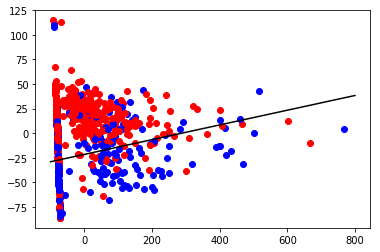

In [58]:
for i in range(target.size):
    if target[i]==0:
        cr+=1
        plt.plot(pca_data[i,0],pca_data[i,1],'ro')
    else:
        cb+=1
        plt.plot(pca_data[i,0],pca_data[i,1],'bo')
w = lin_classifier2.coef_[0]
a = -w[0] / w[1]
x1=np.linspace(-100,800)
y1 = a * x1 - (lin_classifier2.intercept_[0]) / w[1]
plt.plot(x1, y1, 'k-')

In [56]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(target,lin_classifier.predict(df))

array([[443,  57],
       [114, 154]], dtype=int64)

array([[ 0.00308038, -0.03824205]])

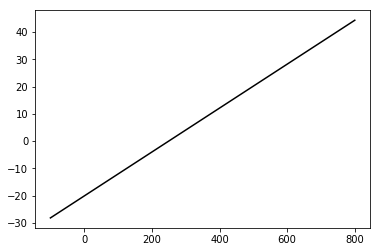

In [69]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [67]:

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out



TypeError: Input z must be a 2D array.

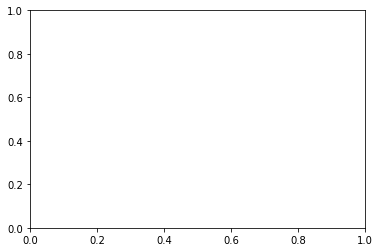

In [68]:
plot_contours(lin_classifier2, x1, y1,cmap=plt.cm.coolwarm, alpha=0.8)

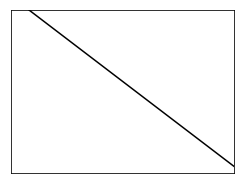

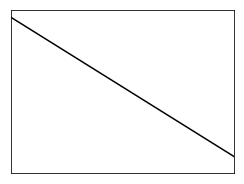

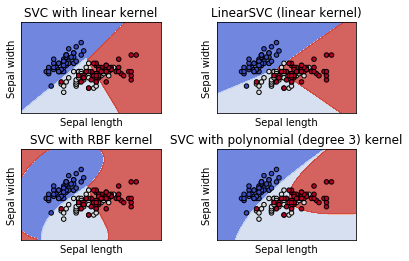

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()